In [56]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

import shapely.geometry.polygon
import json

from functools import partial
import pyproj
from shapely.ops import transform
import pandas as pd

In [86]:
brdf = gpd.read_file('brest/buildings_brest_full.geojson')

In [87]:
brdf.shape

(27174, 5)

In [2]:
# df = gpd.read_file('minsk_belarus.imposm-geojson/minsk_belarus_buildings.geojson')
df = gpd.read_file('geojson/grodno_buildings_full_18.geojson')
df.shape

(26172, 5)

In [57]:
all_results_grodno = pd.read_csv('data/input/all_results_grodno.csv')

In [68]:
roofs_type_dict = dict(all_results_grodno.values)

In [79]:
def coords_to_array(coords):
    return [[c[1], c[0]] for c in coords]

def get_building_area(building):
    project = partial(
        pyproj.transform,
        pyproj.Proj(init='EPSG:4326'),
        pyproj.Proj(init='EPSG:32633'))
    figure = transform(project, building.geometry)
    return figure.area

def polygon_to_array(p):
    res = dict()
    p_id = int(p.id - 1)
    res['id'] = p_id
    res['centroid'] = [p.geometry.centroid.y, p.geometry.centroid.x]
    res['name'] = p[2]
    res['type'] = p.type
    res['roof_area'] = get_building_area(p)
    is_flat = False
    if p_id in roofs_type_dict:
        is_flat = bool(roofs_type_dict[p_id])
    res['is_flat'] = is_flat
    res['exterior'] = coords_to_array(p.geometry.exterior.coords)
    res['interiors'] = [coords_to_array(x.coords) for x in p.geometry.interiors]
    return res

In [26]:
k = df.ix[15]

In [34]:
pl = df.ix[15]

In [44]:
pl[2]

'Приход Пресвятого Искупителя'

In [30]:
k.name

15

In [81]:
polygon_to_array(df.ix[0])

{'centroid': [53.68630938480518, 23.829517963823307],
 'exterior': [[53.686277791040595, 23.829047942132462],
  [53.68631173774847, 23.829110974044312],
  [53.68633872747668, 23.829074931860674],
  [53.68657476187005, 23.829541971505506],
  [53.68654777214181, 23.829578935698493],
  [53.686582724678054, 23.829646996752274],
  [53.68655573494984, 23.82968496677364],
  [53.68652178824197, 23.82961698953889],
  [53.68627376772707, 23.82997498062343],
  [53.686036727505325, 23.82950995263539],
  [53.68622775107866, 23.829229997069376],
  [53.68628474802023, 23.829150955722465],
  [53.686250717493344, 23.82908599597286],
  [53.686277791040595, 23.829047942132462]],
 'id': 0,
 'interiors': [[[53.68630377494043, 23.82937793766038],
   [53.686204784663964, 23.829520932928546],
   [53.68629673414176, 23.829698964551934],
   [53.68639572441825, 23.829555969283803],
   [53.68630377494043, 23.82937793766038]]],
 'is_flat': True,
 'name': None,
 'roof_area': 1623.2254890467225,
 'type': 'public'}

In [82]:
res = []
for index in range(len(df)):
    poly = df.ix[index]
    if type(poly.geometry) is shapely.geometry.polygon.Polygon:
        res.append(polygon_to_array(poly))

In [71]:
len(res)

26165

In [83]:
with open('data/output/grodno_buildings_26k_roofs_labeled.json', 'w') as f:
    f.write(json.dumps(res))

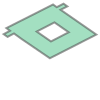

In [39]:
df.ix[0].geometry

In [43]:
[list(x.coords) for x in df.ix[0].geometry.interiors]

[[(23.82937793766038, 53.68630377494043),
  (23.829520932928546, 53.686204784663964),
  (23.829698964551934, 53.68629673414176),
  (23.829555969283803, 53.68639572441825),
  (23.82937793766038, 53.68630377494043)]]

In [29]:
list(df.ix[0].geometry.interiors[0].coords)

[(23.82937793766038, 53.68630377494043),
 (23.829520932928546, 53.686204784663964),
 (23.829698964551934, 53.68629673414176),
 (23.829555969283803, 53.68639572441825),
 (23.82937793766038, 53.68630377494043)]

In [7]:
grodno_small = plt.imread('satellite_maps/grodno_small_test_18.png')

In [82]:
from skimage.io import imread

In [ ]:
img = imread('satellite_maps/grodno_full_18.png')

/opt/conda/lib/python3.5/site-packages/PIL/Image.py:2246: DecompressionBombWarning: Image size (1889796096 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


In [12]:
                            import numpy as np

In [13]:
arr = np.zeros(2**32)

MemoryError: 

In [6]:
from PIL import Image
im = Image.open('satellite_maps/grodno_maps_full/grodno_full_18.bmp')

OSError: Unsupported BMP Size: (52992x50688)

In [5]:
grodno_full = plt.imread('satellite_maps/grodno_maps_full/grodno_full_18.bmp')

OSError: Unsupported BMP Size: (52992x50688)

In [11]:
# min_lon = 23.8
# max_lon = 23.85
# top_lat = 53.69
# bottom_lat = 53.64.
move_left=-0.0001
move_up=0.00005

# move_left=0
# move_up=0

min_lon =   23.79913330078125+move_left
max_lon =   23.85131835937500+move_left
top_lat=   53.69020140888777+move_up
bottom_lat=   53.63975308561533+move_up

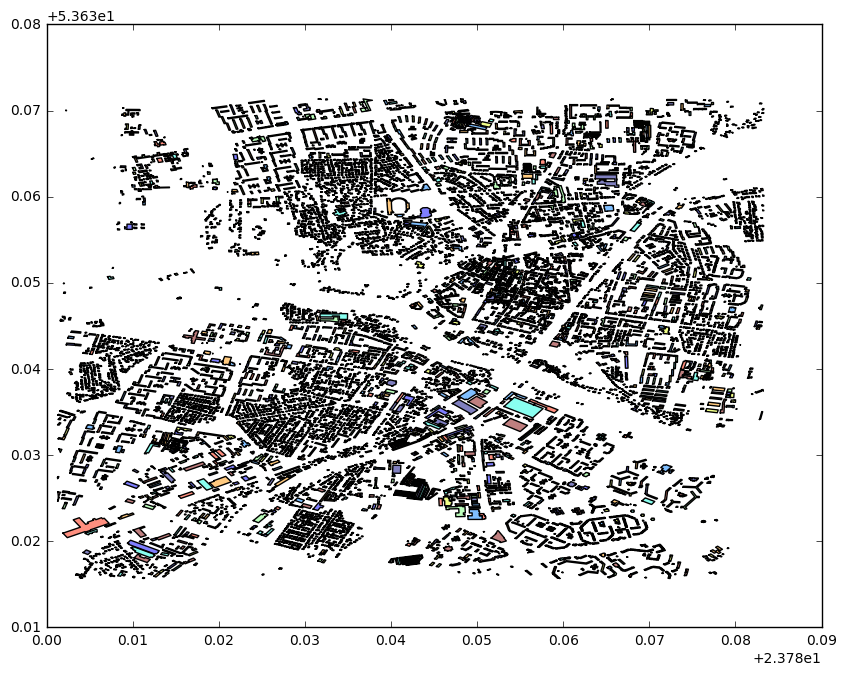

In [90]:
df.plot(figsize=(10,20))

In [120]:
# pp = Point(27.5528669,53.8991698)
# pp = Point(27.5551613, 53.8991461)
pp = Point(23.83, 53.65)
pp = Point(23.8321414, 53.6959896)

In [121]:
n_houses = df.geometry.centroid.distance(pp).sort_values().head(50)

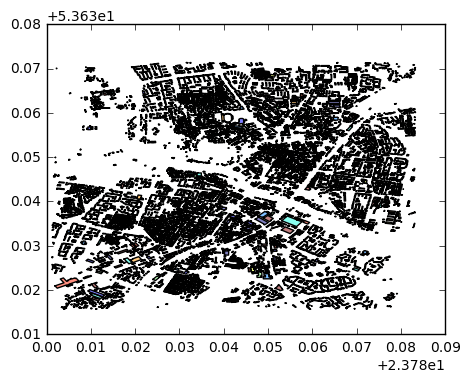

In [11]:
df.plot()

In [12]:
sg_boundary = df.ix[18780].geometry

sg_boundary

KeyError: 18780

In [3]:
import matplotlib.pyplot as plt

In [124]:
houses = df.ix[n_houses.index]

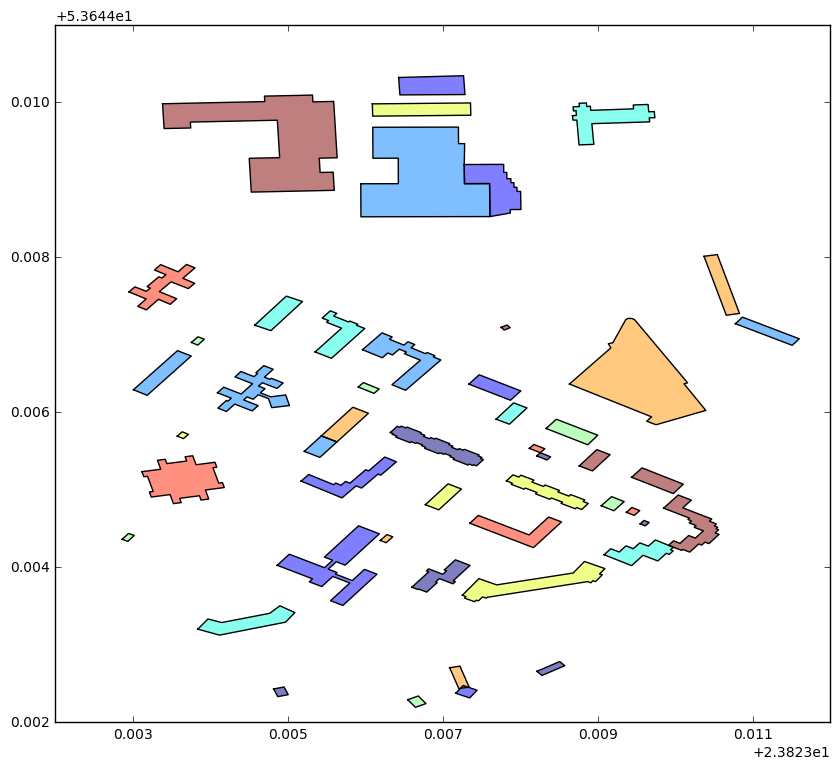

In [7]:
houses.plot(figsize=(10,20))

In [8]:
import os
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs


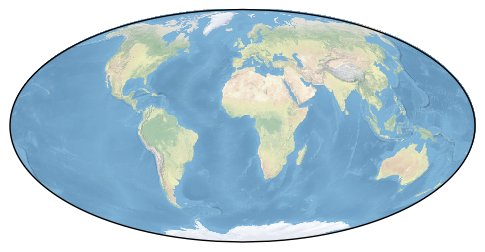

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
houses.plot(figsize=(10,20), ax=ax)

In [36]:
houses

,geometry,id,name,osm_id,type
8334,"POLYGON ((23.82932244946139 53.64973914726951,...",8335.0,None,222486218.0,apartments
2505,"POLYGON ((23.83033464808861 53.65036309614177,...",2506.0,None,29130902.0,residential
2572,"POLYGON ((23.82896227908202 53.65080742082898,...",2573.0,None,29133296.0,residential
2507,"POLYGON ((23.83068601746965 53.64991114392265,...",2508.0,None,29130906.0,residential
8791,"POLYGON ((23.82890788053044 53.65032629958682,...",8792.0,None,307366257.0,yes
2510,"POLYGON ((23.82977314439503 53.64880766636986,...",2511.0,None,29133291.0,residential
8333,"POLYGON ((23.82843128551599 53.64969564519205,...",8334.0,None,222485423.0,apartments
1298,"POLYGON ((23.83111525473117 53.64953412591791,...",1299.0,None,29126825.0,industrial
8943,"POLYGON ((23.83075148013344 53.65109533920301,...",8944.0,None,367453084.0,yes
1282,"POLYGON ((23.83121064078929 53.64943706347916,...",1283.0,None,29126824.0,industrial


In [123]:
n_houses

1908    0.000364
1903    0.000605
1905    0.000732
1902    0.000869
1989    0.000980
1904    0.001065
1865    0.001075
1874    0.001160
7585    0.001399
8803    0.001454
1968    0.001663
1918    0.001683
1873    0.001708
1864    0.001786
474     0.001820
2075    0.001840
2377    0.001879
1875    0.001917
9071    0.002026
2400    0.002100
7675    0.002149
1869    0.002171
7586    0.002174
1878    0.002375
1863    0.002546
1057    0.002663
1580    0.002723
8564    0.002757
1906    0.002768
1870    0.002818
1877    0.002844
1659    0.002866
1868    0.002873
7710    0.002901
8985    0.002906
1879    0.002980
1577    0.002986
2025    0.003025
1909    0.003036
1880    0.003116
1912    0.003139
8989    0.003180
9065    0.003216
1582    0.003222
1872    0.003269
2023    0.003353
433     0.003355
1866    0.003360
1914    0.003395
8050    0.003411
dtype: float64

In [128]:
houses

,geometry,id,name,osm_id,type
1908,"POLYGON ((23.83185495768623 53.69541096419556,...",1909.0,None,29129830.0,residential
1903,"POLYGON ((23.83192067180713 53.69653338484952,...",1904.0,None,29129828.0,residential
1905,"POLYGON ((23.83243439865262 53.69641184725349,...",1906.0,None,29129829.0,residential
1902,"POLYGON ((23.8314071964187 53.6966580237497, 2...",1903.0,None,29129827.0,residential
1989,"POLYGON ((23.83301895257995 53.69630397215965,...",1990.0,None,29129785.0,residential
1904,"POLYGON ((23.83128699992718 53.69499195285589,...",1905.0,None,29129826.0,residential
1865,"POLYGON ((23.83104442764935 53.69676707231, 23...",1866.0,None,29129780.0,residential
1874,"POLYGON ((23.83215896931435 53.69513695978083,...",1875.0,None,29129790.0,residential
7585,"POLYGON ((23.83176501986517 53.6974025882086, ...",7586.0,None,40163343.0,yes
8803,"POLYGON ((23.83202854690094 53.69739445776253,...",8804.0,None,313351877.0,roof


In [129]:
evroopt = houses.ix[1908]

In [130]:
evroopt

geometry    POLYGON ((23.83185495768623 53.69541096419556,...
id                                                       1909
name                                                     None
osm_id                                            2.91298e+07
type                                              residential
Name: 1908, dtype: object

In [131]:
eb = evroopt.geometry.bounds

In [46]:
eb

(23.831632166699876, 53.649838975736316, 23.833392366366326, 53.65121184765712)

In [158]:
evroopt.geometry.plot()

AttributeError: 'Polygon' object has no attribute 'plot'

In [168]:
type(houses)

geopandas.geodataframe.GeoDataFrame

In [166]:
houses.head()

,geometry,id,name,osm_id,type
1908,"POLYGON ((23.83185495768623 53.69541096419556,...",1909.0,None,29129830.0,residential
1903,"POLYGON ((23.83192067180713 53.69653338484952,...",1904.0,None,29129828.0,residential
1905,"POLYGON ((23.83243439865262 53.69641184725349,...",1906.0,None,29129829.0,residential
1902,"POLYGON ((23.8314071964187 53.6966580237497, 2...",1903.0,None,29129827.0,residential
1989,"POLYGON ((23.83301895257995 53.69630397215965,...",1990.0,None,29129785.0,residential


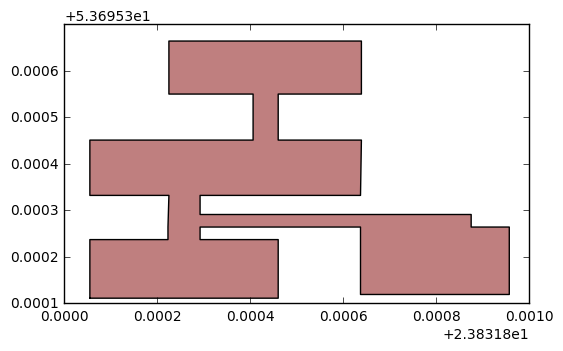

In [170]:
gpd.geodataframe.GeoDataFrame([houses.ix[1908]]).plot()

In [287]:
cnt = evroopt.geometry.centroid

In [294]:
print(cnt.y)

53.69564129500758


In [291]:
print(list(cnt))

TypeError: 'Point' object is not iterable

In [ ]:
evroopt

In [297]:
evroopt.geometry.centroid.x

23.832245865569984

In [302]:
top_lat

53.690251408887775

In [9]:
def get_building_extended_image(building):
    evroopt = building
#     print(evroopt.geometry.centroid)
    eb = evroopt.geometry.bounds
    
    assert(evroopt.geometry.centroid.x>min_lon)
    assert(evroopt.geometry.centroid.x<max_lon)
    
    assert(evroopt.geometry.centroid.y>bottom_lat)
    assert(evroopt.geometry.centroid.y<top_lat)
    
    min_x = max(0, int((eb[0] - min_lon)/(max_lon - min_lon) * grodno_small.shape[1]))
    max_x = int((eb[2] - min_lon)/(max_lon - min_lon) * grodno_small.shape[1])
    min_y = max(0, int((eb[3] - top_lat)/(bottom_lat - top_lat) * grodno_small.shape[0]))
    max_y = int((eb[1] - top_lat)/(bottom_lat - top_lat) * grodno_small.shape[0])
    
    print(min_x)
    print(max_x)
    print(min_y)
    print(max_y)

#     evroopt_image = grodno_small[min_y:max_y, min_x:max_x, :]
#     plt.imshow(evroopt_image)
#     plt.show()
    
    x_shift = 50
    y_shift = 18
    evroopt_image_extended = grodno_small[min_y:max_y+y_shift,min_x:max_x+x_shift,:]
    return evroopt_image_extended
#     plt.title('extended')
#     plt.imshow(evroopt_image_extended)
#     plt.show()

In [316]:
im = get_building_extended_image(df.ix[1])

In [321]:
from skimage.io import imsave

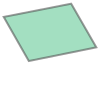

In [353]:
df.ix[255].geometry

In [328]:
df.ix[0]

geometry    POLYGON ((23.82904794213246 53.6862777910406, ...
id                                                          1
name                                                     None
osm_id                                                 -61784
type                                                   public
Name: 0, dtype: object

array([], shape=(0, 227, 3), dtype=float32)

In [348]:
df.ix[0]

geometry    POLYGON ((23.82904794213246 53.6862777910406, ...
id                                                          1
name                                                     None
osm_id                                                 -61784
type                                                   public
Name: 0, dtype: object

In [344]:
for i in range(len(df)):
    cur_b = df.ix[i]
    if i%100 == 0:
        print(i)
    if cur_b.geometry.centroid.x>min_lon and cur_b.geometry.centroid.x<max_lon and cur_b.geometry.centroid.y>bottom_lat and cur_b.geometry.centroid.y<top_lat:
        imsave('data/working/samples/%04d.bmp' % i, get_building_extended_image(cur_b))
    

0
5595
5767
1154
1326
5729
5912
1324
1510
7021
7123
2641
2746
8739
8868
11844
12039
9012
9207
10512
10636
5778
5994
4729
4984
7366
7655
11448
11706
8411
8543
11942
12138
8358
8568
8731
8998
6871
7076
4097
4319
8513
8735
9221
9472
7829
8096
11440
11696
8078
8309
9933
10051
7617
7781
9598
9803
6083
6285
3579
3722
8510
8741
9070
9208
7576
7776
10839
10945
6397
6570
2787
2925
8307
8509
9618
9781
4334
4539
12535
12808
8125
8275
9254
9659
3997
4231
6074
6295
1031
1184
1314
1496
4850
4952
3780
3886
7280
7444
9404
9610
4923
5071
3878
4034
7909
8207
10636
10813
411
534
6124
6261
6211
6290
10377
10658
6388
6485
10543
10575
6699
6983
8637
8987
6355
6490
10582
10662
6963
7159
8403
8640
6670
7117
8360
8953
7014
7233
8463
8740
7091
7294
8495
8763
4237
4529
13466
13548
4144
4598
13162
13518
4131
4501
13341
13456
4118
4528
13276
13403
4113
4558
13202
13339
4096
4543
13167
13287


/opt/conda/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float32 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


3862
4028
13285
13456
100
3996
4453
10840
10977
3982
4440
10898
11030
3968
4426
10952
11071
3179
3231
10908
11026
3240
3287
10906
11056
4041
4117
13275
13520
4224
4422
9954
10315
4275
4380
10392
10605
4113
4175
10532
10593
4132
4217
10342
10513
4364
4434
10269
10386
4389
4688
10440
10561
4484
4645
10378
10449
3938
4478
9009
9347
4408
4647
10393
10488
3911
4015
9100
9274
4185
4311
8799
9105
3967
4203
8948
9117
3987
4201
9025
9171
3999
4281
8767
9030
3854
3989
9042
9131
3874
3943
9132
9240
4482
4678
8790
8978
4487
4711
8841
9028
3731
3925
5163
5326
3269
3445
4883
5027
3623
3724
5107
5187
3663
3733
5078
5134
3615
3924
5156
5371
4634
4742
10582
11059
4778
4866
10787
10963
4660
4817
10759
11126
4809
4977
10727
10813
1728
1911
7084
7217
4262
4688
10725
11159
4449
4624
10552
11086
4340
4570
10494
10909
4015
4232
9080
9225
5930
5996
2951
3022
4696
4918
10897
11148
4005
4049
13340
13509
3035
3085
10937
10979
200
4308
4417
10210
10370
3999
4190
719
814
5173
5341
110
213
6348
6525
0
40
5841
5896


In [ ]:
plt.imsave()

In [ ]:
im.t

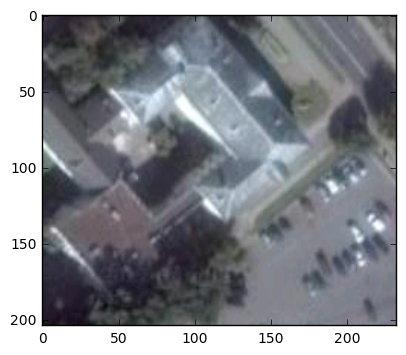

In [317]:
plt.imshow(im)

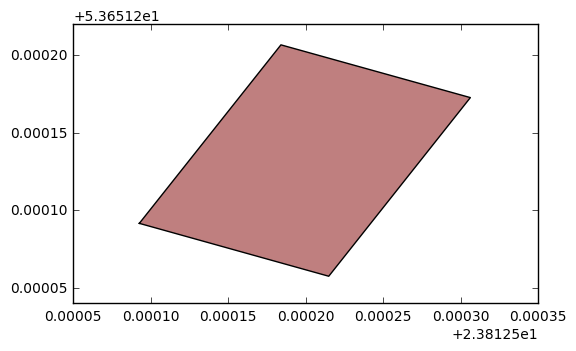

POINT (23.81269946176409 53.65133210104477)


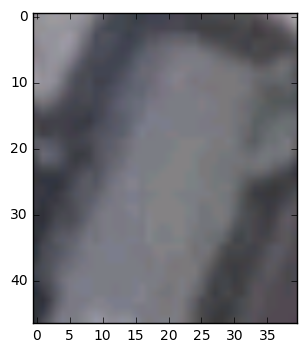

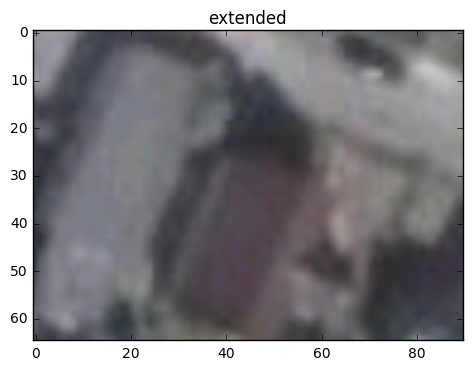

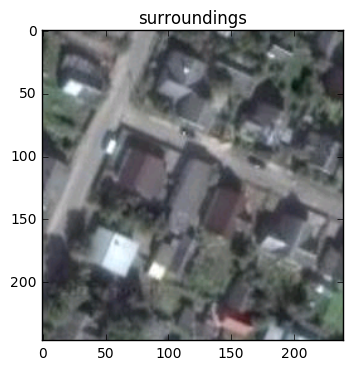

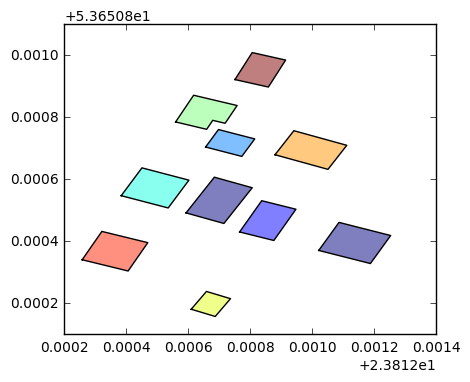

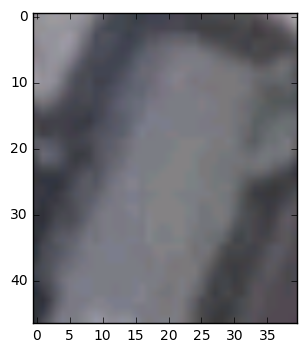

In [42]:
def get_building_by_coords(longitude, latitude, swap=True, plot_surroundings=False):
    if swap:
        longitude, latitude = latitude, longitude
    p = Point(longitude, latitude)

    assert(p.x>min_lon)
    assert(p.x<max_lon)
    
    assert(p.y>bottom_lat)
    assert(p.y<top_lat)


#     print(p)
    n_houses = df.geometry.centroid.distance(p).sort_values().head(20)

    building = df.ix[n_houses.index[0]]
    gpd.geodataframe.GeoDataFrame([building]).plot()
    plt.show()

    evroopt = building
    print(evroopt.geometry.centroid)
    eb = evroopt.geometry.bounds
    
    assert(evroopt.geometry.centroid.x>min_lon)
    assert(evroopt.geometry.centroid.x<max_lon)
    
    assert(evroopt.geometry.centroid.y>bottom_lat)
    assert(evroopt.geometry.centroid.y<top_lat)
    
    min_x = int((eb[0] - min_lon)/(max_lon - min_lon) * grodno_small.shape[1])
    max_x = int((eb[2] - min_lon)/(max_lon - min_lon) * grodno_small.shape[1])
    min_y = int((eb[3] - top_lat)/(bottom_lat - top_lat) * grodno_small.shape[0])
    max_y = int((eb[1] - top_lat)/(bottom_lat - top_lat) * grodno_small.shape[0])

    evroopt_image = grodno_small[min_y:max_y, min_x:max_x, :]
    plt.imshow(evroopt_image)
    plt.show()
    
    x_shift = 50
    y_shift = 18
    evroopt_image_extended = grodno_small[min_y:max_y+y_shift,min_x:max_x+x_shift,:]
    plt.title('extended')
    plt.imshow(evroopt_image_extended)
    plt.show()

    if plot_surroundings:
        surr_len = 100
        evroopt_image_surr = grodno_small[min_y-surr_len:max_y+surr_len,min_x-surr_len:max_x+surr_len,:]
        plt.title('surroundings')
        plt.imshow(evroopt_image_surr)
        plt.show()
        df.ix[n_houses.index[:10]].plot()
        plt.show()

    tmp_img = evroopt_image.copy()
    for i in range(evroopt_image.shape[0]):
        for j in range(evroopt_image.shape[1]):
            pnt_lat = top_lat + (min_y+i+0.0) / grodno_small.shape[0] * (bottom_lat - top_lat)
            pnt_lon = min_lon + (min_x+j+0.0) / grodno_small.shape[1] * (max_lon - min_lon)
            if Point(pnt_lon,pnt_lat).within(evroopt.geometry.boundary):
                s=1-tmp_img[i, j, :]
                tmp_img[i, j, :] = 1-(s*0.2)
    #         print(pnt_lat, pnt_lon)
    plt.imshow(tmp_img)
    plt.show()
    
    
# get_building_by_coords(23.8321414, 53.6959896)
# get_building_by_coords(23.8471843, 53.652622)
# get_building_by_coords(23.8471312,53.6515075)
# get_building_by_coords(23.849389,53.652911,swap=False)
# get_building_by_coords(53.656687, 23.840150)
# get_building_by_coords(53.710471, 23.845995, plot_surroundings=True)
# get_building_by_coords(53.617367, 23.807851, plot_surroundings=True)
b = df.ix[3564].geometry.centroid
get_building_by_coords(b.y, b.x, plot_surroundings=True)

In [308]:
max_lon

23.851218359375

In [14]:
grodno_small.shape

(15872, 9728, 3)

In [101]:
houses

,geometry,id,name,osm_id,type
8334,"POLYGON ((23.82932244946139 53.64973914726951,...",8335.0,None,222486218.0,apartments
2505,"POLYGON ((23.83033464808861 53.65036309614177,...",2506.0,None,29130902.0,residential
2572,"POLYGON ((23.82896227908202 53.65080742082898,...",2573.0,None,29133296.0,residential
2507,"POLYGON ((23.83068601746965 53.64991114392265,...",2508.0,None,29130906.0,residential
8791,"POLYGON ((23.82890788053044 53.65032629958682,...",8792.0,None,307366257.0,yes
2510,"POLYGON ((23.82977314439503 53.64880766636986,...",2511.0,None,29133291.0,residential
8333,"POLYGON ((23.82843128551599 53.64969564519205,...",8334.0,None,222485423.0,apartments
1298,"POLYGON ((23.83111525473117 53.64953412591791,...",1299.0,None,29126825.0,industrial
8943,"POLYGON ((23.83075148013344 53.65109533920301,...",8944.0,None,367453084.0,yes
1282,"POLYGON ((23.83121064078929 53.64943706347916,...",1283.0,None,29126824.0,industrial


In [136]:
evroopt = houses.ix[1908]
eb = evroopt.geometry.bounds
# evroop

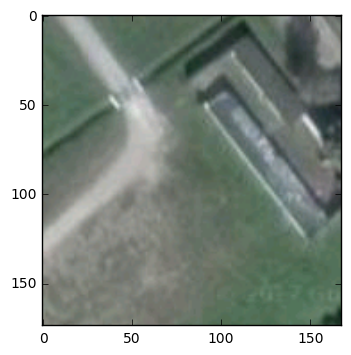

In [137]:
min_x = int((eb[0] - min_lon)/(max_lon - min_lon) * grodno_small.shape[1])
max_x = int((eb[2] - min_lon)/(max_lon - min_lon) * grodno_small.shape[1])
min_y = int((eb[3] - top_lat)/(bottom_lat - top_lat) * grodno_small.shape[0])
max_y = int((eb[1] - top_lat)/(bottom_lat - top_lat) * grodno_small.shape[0])

evroopt_image = grodno_small[min_y:max_y, min_x:max_x, :]

plt.imshow(evroopt_image)

In [95]:
houses

,geometry,id,name,osm_id,type
8334,"POLYGON ((23.82932244946139 53.64973914726951,...",8335.0,None,222486218.0,apartments
2505,"POLYGON ((23.83033464808861 53.65036309614177,...",2506.0,None,29130902.0,residential
2572,"POLYGON ((23.82896227908202 53.65080742082898,...",2573.0,None,29133296.0,residential
2507,"POLYGON ((23.83068601746965 53.64991114392265,...",2508.0,None,29130906.0,residential
8791,"POLYGON ((23.82890788053044 53.65032629958682,...",8792.0,None,307366257.0,yes
2510,"POLYGON ((23.82977314439503 53.64880766636986,...",2511.0,None,29133291.0,residential
8333,"POLYGON ((23.82843128551599 53.64969564519205,...",8334.0,None,222485423.0,apartments
1298,"POLYGON ((23.83111525473117 53.64953412591791,...",1299.0,None,29126825.0,industrial
8943,"POLYGON ((23.83075148013344 53.65109533920301,...",8944.0,None,367453084.0,yes
1282,"POLYGON ((23.83121064078929 53.64943706347916,...",1283.0,None,29126824.0,industrial


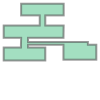

In [138]:
houses.ix[1908].geometry

In [18]:
evroopt.geom

8063

In [ ]:
P

In [41]:
r = evroopt.geometry.centroid

In [43]:
print(r)

POINT (23.83253836769375 53.65044192152697)


In [ ]:
evroopt=houses.ix[710].ge

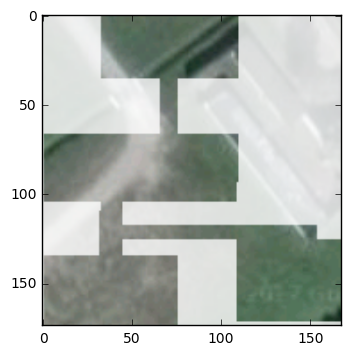

In [139]:
tmp_img = evroopt_image.copy()
for i in range(evroopt_image.shape[0]):
    for j in range(evroopt_image.shape[1]):
        pnt_lat = top_lat + (min_y+i+0.0) / grodno_small.shape[0] * (bottom_lat - top_lat)
        pnt_lon = min_lon + (min_x+j+0.0) / grodno_small.shape[1] * (max_lon - min_lon)
        if not Point(pnt_lon,pnt_lat).within(evroopt.geometry):
            s=1-tmp_img[i, j, :]
            tmp_img[i, j, :] = 1-(s*0.2)
#         print(pnt_lat, pnt_lon)
plt.imshow(tmp_img)
plt.show()

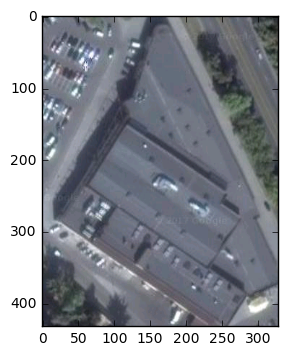

In [16]:
plt.imshow(evroopt_image)

In [27]:
import skimage

In [21]:
evroopt.geometry.boundary

shapely.geometry.linestring.LineString

In [26]:
evroopt.geometry.contains()

'<path fill-rule="evenodd" fill="#66cc99" stroke="#555555" stroke-width="2.0" opacity="0.6" d="M 23.831632166699876,53.65036435342725 L 23.832166429208172,53.65083063870077 L 23.832134326518997,53.65088445051916 L 23.83219274838413,53.65089744246907 L 23.83236005117146,53.65119734696461 L 23.832387124718707,53.65120991981939 L 23.832420819969485,53.65121184765712 L 23.832447222964475,53.65120774052457 L 23.832473458321402,53.65119449711752 L 23.833094138251393,53.65045504561956 L 23.833156751068113,53.65038044668134 L 23.833110734419677,53.65036762236949 L 23.833392366366326,53.65002404815839 L 23.83275022876418,53.649838975736316 L 23.83262927790139,53.64988465710863 L 23.83269298036552,53.64994073204084 L 23.831632166699876,53.65036435342725 z" />'

In [65]:
evroopt.geometry.centroid.bounds

(23.832538367693754, 53.65044192152697, 23.832538367693754, 53.65044192152697)

In [57]:
min_y, max_y
# min_x, max_x

(12312, 12748)

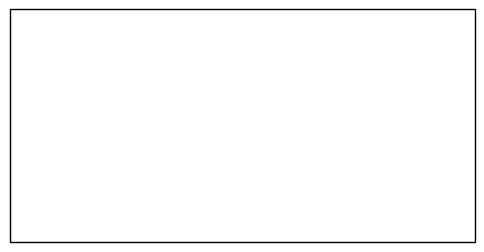

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

# ny_lon, ny_lat = -75, 43
# delhi_lon, delhi_lat = 77.23, 28.61

# plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
#          color='blue', linewidth=2, marker='o',
#          transform=ccrs.Geodetic(),
#          )

# plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
#          color='gray', linestyle='--',
#          transform=ccrs.PlateCarree(),
#          )

# plt.text(ny_lon - 3, ny_lat - 12, 'New York',
#          horizontalalignment='right',
#          transform=ccrs.Geodetic())

# plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
#          horizontalalignment='left',
#          transform=ccrs.Geodetic())

# plt.show()

In [37]:
p = df.ix[666].geometry

In [81]:
from bokeh.plotting import figure, save

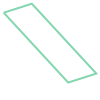

In [38]:
p.boundary

In [82]:
p = figure(title="My first interactive plot!")

In [83]:
p

In [85]:
x_coords = [0,1,2,3,4]
y_coords = [5,4,1,2,0]
p.circle(x=x_coords, y=y_coords, size=10, color="red")
outfp = "points.html"
save(obj=p, filename=outfp)

/opt/conda/lib/python3.5/site-packages/bokeh/io.py:430: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warnings.warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/opt/conda/lib/python3.5/site-packages/bokeh/io.py:440: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warnings.warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/tmp/working/points.html'